In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats
from statsmodels.stats.stattools import medcouple
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

<div class="jumbotron">
    <h1 class="display-1">数据与探索</h1>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

## 数据（Data）

### 定义 

<dl class="row alert alert-info">
    <dt class="col-md-1">数据</dt>
    <dd class="col-md-11">对象（objects）与它们属性（attributes）的集合。</dd>
</dl>

<center><img src="./img/explore/data.svg" width=100%></center>

<dl class="row alert alert-danger">
    <dt class="col-md-1">属性</dt>
    <dd class="col-md-11">对象的特性（characteristic）或性质（property）。</dd>
</dl>

- 通常也被称作*变量（variable）*、*字段（field）*、*维度（dimension）*、*特征（feature）*

<dl class="row alert alert-info">
    <dt class="col-md-4">对象</dt>
    <dd class="col-md-8">属性的集合</dt>
</dl>

- 通常也被称为*记录（record）*、*点（point）*、*样本（sample）*、*实例（instance）*、*案例（case）*、*实体（entity）* 

### 属性的类型

- 属性的类型取决于该属性的数值具备下列哪些性质
    + **相异性**（distinctness）：$=$ 和 $\ne$
    + **序**（order）：$\lt$，$\le$，$\gt$ 和 $\ge$
    + **有意义的差**（meaningful differences）：$+$ 和 $-$
    + **有意义的比率**（meaningful ratios）：$\times$ 和 $/$

属性类型|特点|包含的性质|示例|适合的统计量
---|---|---|---|---
标称（nominal）|仅仅是名称|相异性|名字、班级、颜色|众数
序数（ordinal）|具有自然排序|相异性、序|年级、等级|众数、中位数
区间（interval）|没有绝对零点、等间隔|相异性、序、有意义的差|温度、日期、IQ|众数、中位数、均值、方差
比率（ratio）|有绝对零点|相异性、序、有意义的差、有意义的比率|距离、重量、收入|众数、中位数、均值、方差、几何均值

ID|工作状况|教育水平|居住年限|信用状况
---|---|---|---|---
1|就业|研究生|5|好
2|就业|高中|2|差
3|失业|本科生|1|差
4|就业|高中|10|好

- ID: 标称

- 工作状况：标称

- 教育水平：序数

- 居住年限：比率

- 信用状况：序数

# 数据获取

<center>
    <img src="./img/explore/dataAcquire.svg" width=80%>
</center>

## 从键盘、文本文件、office文件获取数据

### 从键盘获取数据

```python
input([prompt])
```
- `Python`内置函数，接收任意输入，将所有输入默认为字符串处理，并返回<span class="mark">**字符串类型**</span>
- `prompt`：提示信息，可以不设置

```python
a = input('请输入：')
type(a)
```

> 如何识别输入的数值？

- `int()`：转换为整型

- `float()`：转换为浮点型

### 从文本获取数据

<p class="alert alert-info">以<code>.txt</code>、<code>.csv</code>、<code>.json</code>为后缀名的文件</p>

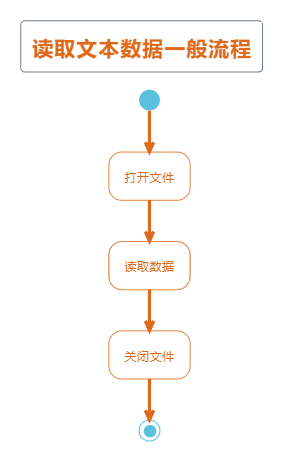

#### 打开文本

```python
open(file, mode='r', encoding=None)
```
- `Python`内置函数，打开一个文件，并返回**<span class="mark">文件对象</span>**
- `file`：必需，文件路径（相对或者绝对路径）
- `mode`：可选，文件打开模式
- `encoding`：用哪种编码打开文本，一般使用'utf8'，打开中文有时令`encoding='gbk'`或`encoding='gb2312'`

模式|描述
:---:|:---
`r`|以只读方式打开文件，这是默认模式。
`w`|打开一个文件只用于写入。如果该文件已存在则打开文件，原有内容会被删除。如果该文件不存在，创建新文件。
`a`|打开一个文件用于追加。如果该文件已存在，新的内容将会被写入到已有内容之后。如果该文件不存在，创建新文件进行写入。

#### 读取`txt`数据

```python
file.read([size])
```
- `file`是一个被打开的文本对象。
- `size`：从文件读取指定的字节数，如果未给定或为负则读取所有内容。

```python
file.readline()
```
- 读取整行，包括 "\n" 字符。
- 多行本文，只能读取第一行。

```python	
file.readlines()
```
- 读取所有行并返回列表，形如`[line1,line2,…,lineN]`

```python
file.close()
```
- 关闭文件。关闭后文件不能再进行读写操作。

<p class="h2 display-1">读取<code>BASKETS.txt</code></p>

```python
f = open('./data/explore/BASKETS.txt', mode='r')
```

```python
cnt = f.read()
```

```python
line = f.readline()
```

```python
lines = f.readlines()
for line in lines:
    print(line)
```

```python
f.close()
```

#### json (JavaScript Object Notation)

- 一种轻量级的数据格式，便于人的阅读和书写，也便于计算机的解析和生成。

- name/value pairs的集合，即`Python`中的字典（dictionary）类型。

<img src="./img/pandas/object.gif" width=60%>

- name是**<span class="mark">字符串</span>**，而value可以取的值的类型包括
<center><img src="./img/pandas/value.gif" width=80%></center>

```json
{
    "name": "John Smith",
    "studentID": "stu001",
    "age": 20,
    "class": "管理2019",
    "courses": ["管理学","经济学","数据分析"],
    "graduated": False
}
```

#### 读取`json`数据

```python
import json
json.load(fp)
```
- `fp`：用`open()`方法打开的包含`json`格式的文本对象
- 返回一个`Python`对象

```python
import json
f = open('./data/introduction/movie/movie_list_2015_v2.json', 'r')
jsn = json.load(f)
f.close()
```

### 从数据库获取数据

- MySQL数据库

- 接口包：`PyMySQL`

- 安装方式
    + `Windows`：在`Jupyter Notebook`的代码单元格中输入`!pip install -U PyMySQL`
    + `Mac`：在`Jupyter Notebook`的代码单元格中输入`!pip3 install -U PyMySQL`

- 使用方式参考

[Python3 MySQL 数据库连接  https://www.runoob.com/python3/python3-mysql.html](https://www.runoob.com/python3/python3-mysql.html)

### 从互联网上获取数据

<dl class="row alert alert-info">
    <dt class="col-md-1">爬虫</dt>
    <dd class="col-md-auto">即网络爬虫，是一种按照一定的规则，自动的抓取互联网信息的程序或者脚本。</dd>
</dl>

<dl class="row alert alert-primary">
    <dt class="col-md-1">静态网页</dt>
    <dd class="col-md-auto">纯粹HTML格式的网页，文件扩展名是<code>.htm</code>、<code>.html</code>。没有后台数据库、不可交互的网页。</dd>
</dl>

<dl class="row alert alert-warning">
    <dt class="col-md-1">动态网页</dt>
    <dd class="col-md-auto">基本的HTML语法规范与高级程序设计语言、数据库编程等多种技术的融合，以期实现对网站内容和风格的高效、动态和交互式的管理。</dd>
</dl>

- `requests-HTML`包, [https://requests-html.kennethreitz.org/](https://requests-html.kennethreitz.org/)

- 通过`Jupyter Notebook`安装
    + `Windows`：`!pip install requests-html`
    + `Mac`：`!pip3 install requests-html`

#### 爬取网页

```python
from requests_html import HTMLSession
ss = HTMLSession()                   # 生成一个HTMLSession对象ss
ct = ss.get('http://quotes.toscrape.com/')   # 爬取网页内容，存储在变量ct中
```

<dl class="row alert alert-primary">
    <dt class="col-md-1">Session</dt>
    <dd class="col-md-auto">在网络应用中，称为“会话控制”。</dd>
    <dd class="col-md-auto">Session对象存储特定用户会话所需的属性及配置信息。</dd>
</dl>

#### 获取网页上的元素

##### 获取网页上的链接

```python
ct.html.absolute_links    # 获取网页页面上的所有链接，返回链接的列表
```

```python
for html in ct.html:
    print(html)        # 获取网页包含的分页网址
```

##### 查找网页上某个元素

- 查找[http://quotes.toscrape.com/](http://quotes.toscrape.com/)上的所有作者

<center>
    <div class="row">
        <div class="col-md-6">Chrome<img src="./img/explore/inspectEle.jpg" width=95%></div>
        <div class="col-md-6">FireFox<img src="./img/explore/inspectEleF.jpg" width=95%></div>
    </div>
</center>

<center><img src="./img/explore/selectEle.jpg" width=80%></center>

```python
authors = ct.html.find('.author',first=False) 
# first=False 找到页面上所有属于author类的元素，返回列表
# first=True 找到页面上第一个属于author类的元素

for author in authors:
    print(author.text)               # 用text显示每个元素包含的文本
```

##### 获取元素的属性

- 获取学校主页上的新闻题目

```python
ctn = ss.get('https://www.cumtb.edu.cn')
titles = ctn.html.find('.li-str',first=False)
for title in titles:
    print(title.attrs['title'])    # attrs[] 括号中填入属性的名称
```

# 数据预处理

<dl class="row alert alert-info">
    <dt class="col-md-3">数据预处理 (Data preprocessing)</dt>
    <dd class="col-md-auto">指在对数据进行数据挖掘以前，先对原始数据进行必要的清洗、集成、转换、离散和归约等一系列的处理工作，以达到分析挖掘方法进行知识获取研究所要求的规范和标准。</dd>
</dl>

- 数据清洗
- 数据集成
- 数据变化
- 数据规约

## 数据清洗

<dl class="row alert alert-info">
    <dt class="col-md-2">数据清洗 (Data cleansing)</dt>
    <dd class="col-md-auto">指的是填充缺失数据、消除噪声数据等操作，通过分析“脏数据”的产生原因和存在形式，利用现有的数据挖掘手段和方法将“脏数据”转化为满足数据质量要求或应用要求的数据。</dd>
</dl>

### 数据质量

<center><img src="./img/explore/dataQuality.svg" width=60%></center>

### 数据质量问题分类

<center><img src="./img/explore/dataQualityProp.svg" width=80%></center>

### 数据清洗处理

- 针对实例层数据清洗

<center><img src="./img/explore/dataClean.svg" width=80%></center>

##### 缺失数据处理

- 删除含有缺失值的记录或属性

- 统计量填补缺失值，例如均值、众数、极值等

##### 相似重复对象检验

<dl class="row alert alert-info">
    <dt class="col-md-4">重复记录</dt>
    <dd class="col-md-auto">多个记录代表同一实体的现象。</dd>
</dl>

<dl class="row alert alert-warning">
    <dt class="col-md-2">相似重复记录</dt>
    <dd class="col-md-auto">有些记录并非完全重复，其个别字段存在一定差别，但表示的却是同一对象。</dd>
</dl>

- 基于**字段**的重复检测
- 基于**记录**的重复检测

##### 异常数据处理 

<dl class="row alert alert-info">
    <dt class="col-md-2">异常数据</dt>
    <dd class="col-md-auto">指数据中不符合一般规律的数据对象，又称为孤立点。</dd>
</dl>

- 利用统计量检测，例如3倍标准差
- 基于距离检测
- 基于密度，离群点的局部密度显著低于大部分近邻点

> 异常数据可能是去掉的噪声，也可能是含有**重要信息**的数据单元。

##### 逻辑错误检测

<dl class="row alert alert-info">
    <dt class="col-md-2">逻辑错误</dt>
    <dd class="col-md-auto">指数据集中的属性值与实际值不符，或违背了业务规则或逻辑。</dd>
</dl>

- 利用专业知识指定约束规则，生成属性值的有效范围

##### 不一致数据

<dl class="row alert alert-warning">
    <dt class="col-md-2">不一致数据</dt>
    <dd class="col-md-auto">多数据源数据集成时，由于不同数据源对同一现实事物可能存在不一致的表示，从而产生不一致的数据。</dd>
</dl>

## 数据集成

<p class="alert alert-info">将多个数据源中的数据合并并存放到一个一致的数据存储（如数据仓库）中</p>

<p class="h2 display-1">数据集成中需要注意的问题：</p>

- 多个数据源的记录如何匹配
    + 例，一个数据库中的`customer_id`和另一个数据库中的`cust_number`指的是否同一实体?

- 如何处理属性的冗余
    + 例，一名员工的年薪属性可以从其工资表中计算得到。

- 多个数据源属性值冲突的检测与处理
    + 例，同一个属性在一个数据源中用**米**为单位，而在另一个数据源中用**英尺**为单位

## 数据变换

<p class="alert alert-danger">对数据进行规范化处理，构成一个适合数据挖掘的描述形式。</p>

<center><img src="./img/explore/dataTransform.svg" width=80%></center>

## 数据规约

<p class="alert alert-warning">减小数据集容量，但仍接近保持原数据的完整性。</p>

<center><img src="./img/explore/dataReduction.svg" width=80%></center>

### 记录数量的降低

- 数据立方体存储多维聚集信息
    + 按照属性的多个概念分层将数据聚集，用聚集后的数据展开分析
    + 例，对产品销售额按照城市、省、区域等聚集分析

<center><img src="./img/explore/dataCuboid.svg" width=100%></center>

<center><img src="./img/explore/dataAgg.svg" width=80%></center>

### 属性数值的数量降低

- 数值规约
    + 用替代的、较小的数据来减少数据量
    + 例，回归模型用回归参数代替原始数据
    + 例，构建直方图，利用属性数值的分布划分类型

- 概念分层
    + 将标称数据泛化到更抽象的概念层
    + 例，将班级抽象到专业

### 属性数量的减少

- 属性子集选择
    + 从众多属性中选出与分析挖掘任务相关的最小属性集合

<p class="h3 display-1 text-danger"><ins>顾客在线购买预测</ins></p>

顾客ID|页面1|页面2|页面3|...|页面1000|买书？
---|---|---|---|---|---|---
cus001|1|3|1|...|1|是
cus002|2|1|0|...|2|是
cus003|2|0|0|...|0|否
...|...|...|...|...|...|...

只需要保留与买书相关的页面、订单页面，其他页面是无关信息

- 维度规约
    + 将现有数据降低到更小的维度
    + 例，主成分分析方法，将大量相关属性转变成为少量不相关的变量（即主成分）

<p class="h3 display-1 text-danger"><ins>能否用少量指标表示公司的财务绩效？</ins></p>

公司|销售净利率|资产净利率|净资产收益率|销售毛利率
---|---|---|---|---
歌华有线|43.31|7.39|8.73|54.89
五粮液|17.11|12.13|17.29|44.25
用友软件|21.11|6.03|7.00|89.37
...|...|...|...|...

# Pandas

- 是从Panel Data而来的

- 一款开放源码的Python库，为Python编程语言提供了高性能，易于使用的数据结构和数据分析工具

[https://pandas.pydata.org/](https://pandas.pydata.org/)

从零开始学pandas  [http://wiki.jikexueyuan.com/project/start-learning-python/311.html](http://wiki.jikexueyuan.com/project/start-learning-python/311.html)

- 安装`pandas`
    + `Windows`：`!pip install pandas`
    + `Mac`：`!pip3 install pandas`

## 数据结构

- 加载`Pandas`的方式

```python
import pandas as pd
```

- Series
- DataFrame

### Series：一维的带标签（label）的数组

- 可以包含任何类型的数据，例如整型、字符串、浮点数、python对象等

- 标签的集合被称为索引（index）

|数据|9|3|8|
|---|---|---|---|
|索引|0|1|2|

-  s = pd.Series(data, index=index)
    + data可以是列表、字典、单个数值等

#### 由列表（list）生成

```python
s = pd.Series([100, 'python', 'soochow', 'qiwsir'])
```

- 获得Series的数据值

```python
s.values
```
- 值的类型为`numpy`的`ndarray`

- 获得Series的索引

```python
s.index
```

- 自定义索引

```python
s = pd.Series([100, 'python', 'soochow', 'qiwsir'], index=['mark', 'little', 'university', 'name'])
```

```python
s[0]
```

In [2]:
s = pd.Series([100, 'python', 'soochow', 'qiwsir'], index=['mark', 'little', 'university', 'name'])
s
s.values
s.index
s[0]
s['little']

mark              100
little         python
university    soochow
name           qiwsir
dtype: object

array([100, 'python', 'soochow', 'qiwsir'], dtype=object)

Index(['mark', 'little', 'university', 'name'], dtype='object')

100

'python'

```
s['mark']
```
- 可以用`index`访问`Series`的元素

#### 由字典（dict）生成

In [13]:
s = pd.Series({'python': 8000, 'C++': 4100, 'C#': 4000}, index =['java', 'python', 'C++', 'C#'])
s

java         NaN
python    8000.0
C++       4100.0
C#        4000.0
dtype: float64

```python
s = pd.Series({'python': 8000, 'C++': 4100, 'C#': 4000})
```

- 字典的键自动变为索引
- 同样可以自定义索引。如果自定义了索引，新索引会自动寻找原来的索引，如果一样，就取原来索引对应的数据值

```python
s = pd.Series({'python': 8000, 'C++': 4100, 'C#': 4000}, index =['java', 'python', 'C++', 'C#'])
```

#### 由单一数值生成

- <span class="mark">提供index</span>，单一数值将会重复索引长度那么多次数

```python
s = pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])
```

### DataFrame：二维的带标签的数据结构

- 类似于excel或者sql的数据表

<img src="./img/pandas/dataframe.png" width=60%>

- 横行标签被称为Index，竖列标签被称为columns

- DataFrame可以由多种类型的数据生成，包括列表、字典、Series、二维矩阵表、其他的DataFrame等

#### 由dicts of series生成

In [4]:
data = {
    'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
}
d1 = pd.DataFrame(data)
d1

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


#### 由dicts of lists生成

In [5]:
data = {
    "name": ["yahoo","google","facebook"], 
    "marks": [200,400,800], 
    "price": [9, 3, 7]
}
d1= pd.DataFrame(data)
d1

,name,marks,price
0,yahoo,200,9
1,google,400,3
2,facebook,800,7


字典的“键”（"name"，"marks"，"price"）就是 DataFrame 的 columns 的值（名称），字典中每个“键”的“值”是一个列表，它们就是那一竖列中的具体填充数据。上面的定义中没有确定索引，所以，按照惯例（Series 中已经形成的惯例）就是从 0 开始的整数。

In [6]:
d2 = pd.DataFrame(data, columns=['name', 'price', 'marks', 'debt'], index=['a','b','c'])
d2

,name,price,marks,debt
a,yahoo,9,200,NaN
b,google,3,400,NaN
c,facebook,7,800,NaN


#### 由dicts of dicts生成

In [7]:
newData = {
    "lang":{
        "firstline":"python",
        "secondline":"java"
    },
    "price":{
        "firstline":8000
    }
}
d3 = pd.DataFrame(newData)
d3

,lang,price
firstline,python,8000.0
secondline,java,NaN


In [8]:
newData = {
    ('a', 'a'): {
        ('A', 'C'): 3, 
        ('A', 'B'): 4
    },
    ('a', 'c'): {
        ('A', 'B'): 5, 
        ('A', 'C'): 6
    },
    ('b', 'a'): {
        ('A', 'C'): 7, 
        ('A', 'B'): 8
    },
    ('b', 'b'): {
        ('A', 'D'): 9, 
        ('A', 'B'): 10
    }
}
d3 = pd.DataFrame(newData) 
d3

a         b      
       a    c    a     b
A C  3.0  6.0  7.0   NaN
  B  4.0  5.0  8.0  10.0
  D  NaN  NaN  NaN   9.0

## 数据引用

### 列的选择、添加和删除

In [9]:
df = pd.DataFrame({'one': [1., 2., 3., 4.], 'two': [4., 3., 2., 1.]})
df

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


- 选择列

In [10]:
df['one']

0    1.0
1    2.0
2    3.0
3    4.0
Name: one, dtype: float64

- 添加列

In [11]:
df['three'] = df['one'] * df['one']
df

,one,two,three
0,1.0,4.0,1.0
1,2.0,3.0,4.0
2,3.0,2.0,9.0
3,4.0,1.0,16.0


In [12]:
df['flag'] = df['one'] > 2
df

,one,two,three,flag
0,1.0,4.0,1.0,False
1,2.0,3.0,4.0,False
2,3.0,2.0,9.0,True
3,4.0,1.0,16.0,True


In [13]:
df['foo'] = 'bar'
df
dfbk = df.copy()

,one,two,three,flag,foo
0,1.0,4.0,1.0,False,bar
1,2.0,3.0,4.0,False,bar
2,3.0,2.0,9.0,True,bar
3,4.0,1.0,16.0,True,bar


- 删除列

In [14]:
del df['two']
df

,one,three,flag,foo
0,1.0,1.0,False,bar
1,2.0,4.0,False,bar
2,3.0,9.0,True,bar
3,4.0,16.0,True,bar


In [15]:
three = df.pop('three')
df
three

,one,flag,foo
0,1.0,False,bar
1,2.0,False,bar
2,3.0,True,bar
3,4.0,True,bar


0     1.0
1     4.0
2     9.0
3    16.0
Name: three, dtype: float64

- 选择多列
    + 列名列表，例如`['col1','col2','col3']`，返回的是`DataFrame`类型

In [16]:
# dfbk
dfbk

,one,two,three,flag,foo
0,1.0,4.0,1.0,False,bar
1,2.0,3.0,4.0,False,bar
2,3.0,2.0,9.0,True,bar
3,4.0,1.0,16.0,True,bar


In [17]:
dfbk[['one','flag']]

,one,flag
0,1.0,False
1,2.0,False
2,3.0,True
3,4.0,True


### 选择行

- 用标签选择行，`df.loc[label]`
- 用位置选择行，`df.iloc[rowNum]`

#### 用标签选择行 

- 单个标签，例如`'a'`(自定义标签)，`1`（默认标签），返回的是`Series`类型
- 标签列表，例如`['a','b','c']`，返回的是`DataFrame`类型
- 标签切片，例如`'a':'c'`，返回的是`DataFrame`类型
- 一组与数据行数相同的布尔值，例如`[True, False, True]`，可以用判断条件筛选行，返回的是`DataFrame`类型

In [18]:
locDf = pd.DataFrame([[1, 2], [4, 5], [7, 8]], index=['cobra', 'viper', 'sidewinder'], columns=['max_speed', 'shield'])
locDf

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


In [21]:
# locDf.loc['cobra']
# locDf.loc[['cobra','sidewinder']]
# locDf.loc['viper':'sidewinder']                                # 结果包含切片结束的位置
# locDf.loc[locDf['shield']>6]
# locDf.loc[(locDf['max_speed']>=4) & (locDf['shield']>5)]       # 逻辑与用&，每个条件用（）包围
# locDf.loc[(locDf['max_speed']!=4) | (locDf['shield']>5)]       # 逻辑或用|

#### 用位置选择行 

- 单个整数，返回的是`Series`类型
- 整数列表，返回的是`DataFrame`类型
- 整数切片，例如`1:7`，`df.iloc[:]`表示选择所有行，返回的是`DataFrame`类型

In [24]:
# locDf.iloc[1]
# locDf.iloc[[0,2]]
# locDf.iloc[0:2]        # 结果不包括切片结束的位置
# locDf.iloc[:]

### 同时选择行与列

<p class="h3"><strong><code>df.iloc[<span class="bg-primary">行位置</span>，<span class="bg-danger">列位置</span>]</code></strong></p>
<p class="h3"><strong><code>df.loc[<span class="bg-primary">行标签</span>，<span class="bg-danger">列名</span>]</code></strong></p>

In [25]:
dfcar = pd.DataFrame([[1, 2], [4, 5], [7, 8]], columns=['max_speed', 'shield'])
dfcar

,max_speed,shield
0,1,2
1,4,5
2,7,8


In [28]:
# dfcar.iloc[1,1]           # 取某个具体的值
# dfcar.iloc[[0,2],[0,1]]   # 用列表选取指定的行与列构成的DataFrame
# dfcar.iloc[1:2,:1]       # 用切片选取指定的行与列构成的DataFrame
# dfcar.iloc[1:3,[0,1]]     # 切片与列表搭配选择DataFrame
# dfcar.iloc[[0,2],0:3]     # 切片与列表搭配选择DataFrame

,max_speed,shield
0,1,2
2,7,8


In [29]:
dfcaridx = dfcar.copy()
dfcaridx.index = ['alpha','beta','gamma']
dfcaridx

,max_speed,shield
alpha,1,2
beta,4,5
gamma,7,8


In [54]:
# dfcaridx['max_speed']>=4
# dfcaridx.loc[(dfcaridx['max_speed']>=4)|(dfcaridx['shield']>5),:]
# dfcaridx.loc['beta','shield']                                # 取具体单元格值
# dfcaridx.loc[['beta','gamma'],['max_speed','shield']]      # 用列表选取指定的行与列构成的DataFrame
# dfcaridx.loc['beta':'delta','two':'flag']                 # 用标签切片选取指定的行与列构成的DataFrame
# dfcaridx.loc['beta':'delta',['two','flag']]               # 用标签切片选行，用列表选列，构成DataFrame
# dfcaridx.loc[dfbkidx['flag']==True,['one','three']]      # 用逻辑判断选行，用列表选列，构成DataFrame
# dfcaridx.loc[(dfbkidx['one']>=2) & (dfbkidx['two']<2),['one','three','flag']]      # 用逻辑判断选行，用列表选列，构成DataFrame

,max_speed,shield
beta,4,5
gamma,7,8


### 利用`query()`筛选`dataframe`

```python
df.query(expr, inplace=False)
```
- `expr`：字符串表达式
    - 如果引用外部变量，则须在变量前添加`@`
    - 如果列名中有空格，则列名两侧添加``

In [33]:
dfq = pd.DataFrame({'A': range(1, 6),'B': range(10, 0, -2),'C C': range(10, 5, -1)})
dfq

,A,B,C C
0,1,10,10
1,2,8,9
2,3,6,8
3,4,4,7
4,5,2,6


In [35]:
# dfq.query("A>B")
# dfq.query("b==`C C`")
# var = 3
# dfq.query("B>A*@var")
# dfq.query("A>3 and B<6")

,A,B,C C
3,4,4,7
4,5,2,6


## 数据读取与存储

### 读取与存储`.csv`文件

```python
pd.read_csv('path_to_file.csv')
```
- `'path_to_file.csv`：要打开的`.csv`文件的完整路径
- 返回`DataFrame`对象

In [55]:
acceptDf = pd.read_csv('./data/pandas/accepts.csv')
# acceptDf
type(acceptDf)

pandas.core.frame.DataFrame

```python
df.to_csv('path_to_file.csv', index=True)
```
- `'path_to_file.csv'`：保存的以`.csv`结尾的文件的完整路径
- `index`：是否把行索引写入到`.csv`文件中，默认是写入

In [23]:
dfcaridx.to_csv('./data/explore/dfcaridx.csv')

### 读取与存储`excel`文件

- 安装excel的支持包
    + `Windows`
        - `!pip install xlrd`
        - `!pip install openpyxl`
    + `Mac`
        - `!pip3 install xlrd`
        - `!pip3 install openpyxl`

```python
pd.read_excel('path_to_file.xls', sheet_name='Sheet1',engine=None)
```
- `'path_to_file.xls'`：要打开的excel文件的完整路径
- `sheet_name`：打开哪张表格；`sheet_name=['Sheet1','Sheet2','Sheet3']`打开多张表格；`sheet_name=None`打开所有表格
- `engine`：默认为`xlrd`，能够打开旧的excel，例如'.xls'，新的'.xlsx'需要设置为`openpyxl`

In [25]:
drinks = pd.read_excel('./data/explore/drinks.xlsx')
type(drinks)

pandas.core.frame.DataFrame

```python
df.to_excel('path_to_file.xlsx', sheet_name='Sheet1')
```
- `'path_to_file.xls'`：要保存的excel文件的完整路径

In [26]:
# dfbkidx.to_excel('./data/explore/dfbkidx.xlsx', sheet_name='Sheet1')

## 查看`DataFrame`信息

<p class="h4">(1) 查看数据的头和尾</p>

```python
df.head([n=5])
df.tail([n=5])
```
- `n`：显示的行数，默认是5

In [27]:
acceptDf.head()
acceptDf.tail(10)

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,...,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind
0,2314049,11613,1,1998.0,FORD,N,7.0,9.0,64.0,2.0,...,650.0,17200.00,17350.0,0.00,36,17200.00,99.0,6550.00,24000.0,1
1,63539,13449,0,2000.0,DAEWOO,N,0.0,21.0,240.0,11.0,...,649.0,19588.54,19788.0,683.54,60,19588.54,99.0,4666.67,22.0,0
2,7328510,14323,1,1998.0,PLYMOUTH,N,7.0,10.0,60.0,NaN,...,613.0,13595.00,11450.0,0.00,60,10500.00,92.0,2000.00,19600.0,1
3,8725187,15359,1,1997.0,FORD,N,3.0,10.0,35.0,5.0,...,603.0,12999.00,12100.0,3099.00,60,10800.00,118.0,1500.00,10000.0,1
4,4275127,15812,0,2000.0,TOYOTA,N,0.0,10.0,104.0,2.0,...,764.0,26328.04,22024.0,0.00,60,26328.04,122.0,4144.00,14.0,0


,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,...,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind
5835,9205520,9988480,0,1999.0,PONTIAC,N,1.0,21.0,100.0,4.0,...,714.0,21000.00,18000.0,0.0,66,21000.00,123.0,2958.33,30000.0,1
5836,551247,9993925,0,1999.0,MAZDA,N,0.0,12.0,118.0,3.0,...,705.0,33388.40,29575.0,4256.1,60,29132.30,99.0,3416.67,18.0,1
5837,7820738,9994277,0,1996.0,FORD,N,3.0,15.0,116.0,NaN,...,714.0,7316.50,5500.0,1200.0,48,4116.50,82.0,1300.00,69386.0,1
5838,8856051,9996910,0,2000.0,CHEVY,N,0.0,30.0,285.0,NaN,...,725.0,33886.66,28873.0,2000.0,63,31886.66,114.0,5135.00,15.0,0
5839,3879206,10000510,0,1995.0,CHEVY,N,9.0,16.0,143.0,NaN,...,650.0,16490.00,14000.0,2500.0,60,13990.00,112.0,3150.00,72000.0,1
5840,2291068,10005156,0,1997.0,PORSCHE,N,0.0,21.0,417.0,4.0,...,801.0,0.00,31000.0,0.0,36,31000.00,100.0,5000.00,45000.0,1
5841,7647192,10005616,0,2000.0,TOYOTA,Y,2.0,8.0,62.0,5.0,...,628.0,24970.00,22024.0,0.0,60,24970.00,117.0,2400.00,21.0,0
5842,5993246,10006591,0,1997.0,CHEVROLET,N,0.0,6.0,30.0,4.0,...,735.0,20949.00,18950.0,0.0,36,20949.00,113.0,1837.50,25000.0,1
5843,4766566,10010208,0,1999.0,MERCURY,N,0.0,9.0,67.0,7.0,...,737.0,22400.00,28700.0,5300.0,48,17100.00,60.0,28000.00,0.0,0
5844,1928782,10010219,0,2000.0,JEEP,N,1.0,34.0,130.0,8.0,...,741.0,19609.90,20145.0,0.0,52,19609.90,97.0,2700.00,12.0,0


<p class="h4">(2) 查看数据的行索引与列名</p>

```python
df.index          # 行索引
df.columns         # 列名
```

In [28]:
acceptDf.index
acceptDf.columns

RangeIndex(start=0, stop=5845, step=1)

Index(['application_id', 'account_number', 'bad_ind', 'vehicle_year',
       'vehicle_make', 'bankruptcy_ind', 'tot_derog', 'tot_tr',
       'age_oldest_tr', 'tot_open_tr', 'tot_rev_tr', 'tot_rev_debt',
       'tot_rev_line', 'rev_util', 'fico_score', 'purch_price', 'msrp',
       'down_pyt', 'loan_term', 'loan_amt', 'ltv', 'tot_income', 'veh_mileage',
       'used_ind'],
      dtype='object')

<p class="h4">(3) 查看数据的维度</p>

```python
df.shape
```
- 返回一个元组包含2个元素，第一是数据的行数，第二个是数据列数

In [29]:
acceptDf.shape

(5845, 24)

# 数据清理

In [56]:
accept = pd.read_csv('./data/pandas/accepts.csv')

## 缺失值（missing value）

- 在Python中用`NaN`（Not a Number）表示缺失值

In [19]:
accept.head(10)

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,...,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind
0,2314049,11613,1,1998.0,FORD,N,7.0,9.0,64.0,2.0,...,650.0,17200.00,17350.0,0.00,36,17200.00,99.0,6550.00,24000.0,1
1,63539,13449,0,2000.0,DAEWOO,N,0.0,21.0,240.0,11.0,...,649.0,19588.54,19788.0,683.54,60,19588.54,99.0,4666.67,22.0,0
2,7328510,14323,1,1998.0,PLYMOUTH,N,7.0,10.0,60.0,NaN,...,613.0,13595.00,11450.0,0.00,60,10500.00,92.0,2000.00,19600.0,1
3,8725187,15359,1,1997.0,FORD,N,3.0,10.0,35.0,5.0,...,603.0,12999.00,12100.0,3099.00,60,10800.00,118.0,1500.00,10000.0,1
4,4275127,15812,0,2000.0,TOYOTA,N,0.0,10.0,104.0,2.0,...,764.0,26328.04,22024.0,0.00,60,26328.04,122.0,4144.00,14.0,0
5,8712513,16979,0,2000.0,DODGE,Y,2.0,15.0,136.0,4.0,...,680.0,26272.72,26375.0,0.00,36,26272.72,100.0,5400.00,1.0,0
6,2063896,17842,0,2000.0,INFINITI,N,0.0,13.0,339.0,4.0,...,794.0,31069.00,30519.0,0.00,36,9550.00,32.0,5416.67,500.0,0
7,598458,19715,0,1994.0,BUICK,N,0.0,2.0,261.0,NaN,...,722.0,9600.00,8900.0,0.00,54,8600.00,98.0,1560.00,77267.0,1
8,1526052,23924,1,1994.0,MITT,N,2.0,13.0,213.0,3.0,...,664.0,6700.00,6350.0,500.00,42,6800.00,139.0,2416.67,40000.0,1
9,8073975,24866,0,1999.0,CHEV,Y,11.0,20.0,178.0,NaN,...,646.0,15543.00,15100.0,0.00,60,14543.00,102.0,2933.33,6000.0,1


### 判断是否含有缺失值

- ```python
DataFrame.isna()
```

In [57]:
accept.isna()

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,...,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5841,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5842,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5843,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
# accept.isna().sum(axis=1)
accept.loc[accept.isna().sum(axis=1)>0,:]

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,...,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind
2,7328510,14323,1,1998.0,PLYMOUTH,N,7.0,10.0,60.0,NaN,...,613.0,13595.00,11450.0,0.0,60,10500.00,92.0,2000.00,19600.0,1
7,598458,19715,0,1994.0,BUICK,N,0.0,2.0,261.0,NaN,...,722.0,9600.00,8900.0,0.0,54,8600.00,98.0,1560.00,77267.0,1
9,8073975,24866,0,1999.0,CHEV,Y,11.0,20.0,178.0,NaN,...,646.0,15543.00,15100.0,0.0,60,14543.00,102.0,2933.33,6000.0,1
14,8394551,34052,0,1998.0,NISSAN,N,0.0,1.0,12.0,NaN,...,639.0,15651.93,15500.0,500.0,60,15151.93,106.0,1833.33,35984.0,1
19,9784596,52260,0,2000.0,CHEVROLET,Y,6.0,8.0,233.0,NaN,...,557.0,14550.00,15300.0,1000.0,60,13550.00,91.0,0.00,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,8921166,9986461,0,1996.0,CHRYSLER,N,NaN,NaN,NaN,NaN,...,632.0,12581.00,11400.0,1200.0,54,11381.00,101.0,3800.00,36789.0,1
5834,3886066,9987642,1,1997.0,CHRYSLER,N,3.0,14.0,160.0,NaN,...,675.0,15000.00,12750.0,1000.0,60,14000.00,111.0,1833.33,35000.0,1
5837,7820738,9994277,0,1996.0,FORD,N,3.0,15.0,116.0,NaN,...,714.0,7316.50,5500.0,1200.0,48,4116.50,82.0,1300.00,69386.0,1
5838,8856051,9996910,0,2000.0,CHEVY,N,0.0,30.0,285.0,NaN,...,725.0,33886.66,28873.0,2000.0,63,31886.66,114.0,5135.00,15.0,0


### 删除数据对象或属性

- ```python
DataFrame.dropna(axis=0, how='any', inplace=False)
```
    + `axis`
        * 0：删除含有缺失值的行
        * 1：删除含有缺失值的列
    + `how`
        * `any`：只要包含缺失值，就删除相应的行或列
        * `all`：只有当某行（列）所有值都是缺失值的时候，才删除该行（列）
    + `inplace`
        * `True`：改变原数据
        * `False`：不改变原数据，返回删除缺失值的新数据

In [23]:
tmp = accept.dropna(axis=1)
tmp.head()
accept.head()

,application_id,account_number,bad_ind,rev_util,purch_price,down_pyt,loan_term,loan_amt,used_ind
0,2314049,11613,1,101,17200.00,0.00,36,17200.00,1
1,63539,13449,0,60,19588.54,683.54,60,19588.54,0
2,7328510,14323,1,0,13595.00,0.00,60,10500.00,1
3,8725187,15359,1,68,12999.00,3099.00,60,10800.00,1
4,4275127,15812,0,0,26328.04,0.00,60,26328.04,0


,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,...,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind
0,2314049,11613,1,1998.0,FORD,N,7.0,9.0,64.0,2.0,...,650.0,17200.00,17350.0,0.00,36,17200.00,99.0,6550.00,24000.0,1
1,63539,13449,0,2000.0,DAEWOO,N,0.0,21.0,240.0,11.0,...,649.0,19588.54,19788.0,683.54,60,19588.54,99.0,4666.67,22.0,0
2,7328510,14323,1,1998.0,PLYMOUTH,N,7.0,10.0,60.0,NaN,...,613.0,13595.00,11450.0,0.00,60,10500.00,92.0,2000.00,19600.0,1
3,8725187,15359,1,1997.0,FORD,N,3.0,10.0,35.0,5.0,...,603.0,12999.00,12100.0,3099.00,60,10800.00,118.0,1500.00,10000.0,1
4,4275127,15812,0,2000.0,TOYOTA,N,0.0,10.0,104.0,2.0,...,764.0,26328.04,22024.0,0.00,60,26328.04,122.0,4144.00,14.0,0


### 填充缺失值

- ```python
DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None)
```
    + `value`：用于填充缺失值的**标量值**或**字典对象**
        * 标量值：所有缺失值均填相同的数值
        * 字典对象：按列填充不同的缺失值
    + `method`：填充方式
        * `pad`或`ffill`：前向替换，用缺失值的前一个有效值替换该缺失值
        * `backfill`或`bfill`：后向替换，用缺失值的后一个有效值替换该缺失值
    + `limit`：前向或者后向填充的最大连续缺失值的数量

In [58]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0], [3, 4, np.nan, 1], [np.nan, np.nan, np.nan, 5], [np.nan, 3, np.nan, 4]], columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [61]:
# df.fillna(method='bfill',limit=1)
df.fillna({'A':df['A'].mean(), 'B':df['B'].mean()})

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,3.0,NaN,5
3,3.0,3.0,NaN,4


### 用插值法估计缺失值

- ```python
DataFrame.interpolate(method='linear', axis=0, limit=None, inplace=False, limit_direction='forward')
```
    + `method`
        * `linear`：线性插值，数值之间等间距
        * `polynomial`：多项式插值，要补充参数，该多项式的阶数`order=n`
        * `pad`：用现有值估计

In [62]:
df = pd.DataFrame([(0.0,  np.nan, -1.0, 9.0), (np.nan, 2.0, np.nan, np.nan), (2.0, 3.0, np.nan, 25.0), (np.nan, 4.0, -4.0, 36.0)], columns=list('abcd'))
df


,a,b,c,d
0,0.0,NaN,-1.0,9.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,25.0
3,NaN,4.0,-4.0,36.0


In [28]:
df['d'].interpolate(method='polynomial', order=2)

0     9.0
1    16.0
2    25.0
3    36.0
Name: d, dtype: float64

## 重复数据（duplicates）

### 识别重复数据

- ```python
DataFrame.duplicated(keep='first')
```
    + 返回布尔变量构成的序列，标明哪些行是重复的
    + `keep`
        * `first`：第一次出现的标记为`False`，其他重复的标记为`True`
        * `last`：最后一次出现的标记为`False`，其他重复的标记为`True`
        * `False`：重复的全部标记为`True`

In [64]:
df = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'], 'k2': [1, 1, 2, 3, 3, 4, 4]})
df
df.duplicated(keep='first')

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [112]:
df.loc[~df.duplicated(keep=False),:]

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3


### 删除重复数据

- ```python
DataFrame.drop_duplicates(keep='first', inplace=False)
```

In [31]:
df.drop_duplicates(keep='last') 

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
6,two,4


### 是否所有的重复数据都需要删除？

- 重复记录，处理样本不均衡
    + 分组或分类问题中，有些组/类的样本少，需要采用**随机过采样**的方法复制样本

- 检验业务规则中存在的问题
    + 例如，在线购物的时候多次点击下单，如果出现重复的订单记录，可能说明下单系统存在问题

## 离群点（outliers）

- 拥有与数据集中大部分数据显著不同特征的数据对象

<img src="./img/pandas/outliers.png" width=50%>

- 一些离群点会干扰数据分析，是需要去除的

- 另外一些离群点则会是数据挖掘的分析对象
    + 信用证欺诈
    + 网络入侵

### 如何判断是否有离群点?

- 箱型图

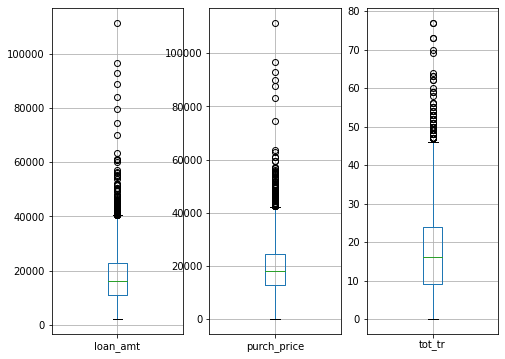

In [99]:
_ = accept[['loan_amt','purch_price','tot_tr']].plot(kind='box',figsize=(8,6),subplots=True,layout=(1,3),grid=True)

### Z-score方法

- 在正态分布下，99.7%的数据位于$[\mu-3\sigma,\mu+3\sigma]$

<img src="./img/pandas/normalDist.png" width=50%>

In [39]:
# 生成正态随机数

normalData = np.random.normal(loc=0.0, scale=1.0, size=10000)

<AxesSubplot:ylabel='Density'>

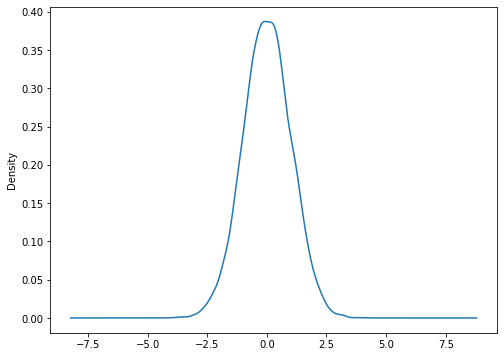

In [44]:
# 绘制正态分布密度函数

pd.Series(normalData).plot(kind='kde',figsize=(8,6))

In [48]:
# 计算标准正态分布3倍标准差之内数据的概率

stats.norm.cdf(3)-stats.norm.cdf(-3)

0.9973002039367398

```python 
from scipy import stats
```

- Z-score公式
$$
\hat{x}=\frac{x-\mu}{\sigma}
$$

In [54]:
rev = accept.loc[np.abs((accept['loan_amt']-accept['loan_amt'].mean())/accept['loan_amt'].std())>3,'loan_amt']
rev

315      60980.00
425      46418.92
474      49921.92
599      45600.00
685      45500.00
716     111554.00
724      45500.00
935      63345.00
1124     49321.56
1228     89000.00
1252     47622.00
1364     45049.00
1374     92999.75
1549     46820.41
1654     45994.15
1683     50604.35
1835     55280.45
1857     48214.00
1859     79750.00
1902     74500.00
1923     51611.00
2327     51502.81
2377     49400.00
2401     52000.00
2415     55945.00
2566     60868.00
2588     45512.00
2779     52093.00
3072     50485.00
3155     47723.25
3248     96692.33
3659     49967.00
3660     57000.00
3687     45424.00
4139     54825.00
4404     54837.00
4481     54500.00
4585     70000.00
4644     61327.00
4646     46000.00
4794     84183.25
4832     52050.00
4872     45630.00
5080     51590.18
5102     51750.00
5145     45112.00
5275     53883.00
5421     45870.00
5442     47058.79
5680     59975.00
5686     56330.07
Name: loan_amt, dtype: float64

- 利用`scipy.stats`中的`zscore`函数计算

In [101]:
# np.abs(stats.zscore(accept[['loan_amt','purch_price']])) > 3
rev1 = accept[(np.abs(stats.zscore(accept[['loan_amt','purch_price']])) > 3).any(axis=1)]
rev1

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,...,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind
15,6442136,38793,0,1997.0,LOTUS,N,1.0,11.0,58.0,5.0,...,689.0,63700.00,57000.0,35000.00,60,28700.00,50.0,8333.33,14000.0,1
315,7576141,539438,0,2000.0,BMW,N,0.0,10.0,134.0,NaN,...,724.0,59635.00,57000.0,0.00,48,60980.00,107.0,12000.00,1.0,0
389,3003154,656814,0,2000.0,FORD,N,12.0,39.0,255.0,17.0,...,690.0,47570.00,42015.0,3382.15,60,44187.85,105.0,16666.67,11.0,0
425,9871684,730329,0,1998.0,LEXUS,N,2.0,60.0,296.0,9.0,...,677.0,47141.56,47000.0,722.64,48,46418.92,100.0,16666.67,27500.0,1
474,2821423,818833,0,2000.0,TOYOTA,N,0.0,20.0,219.0,4.0,...,751.0,49921.92,57254.0,0.00,60,49921.92,90.0,10416.67,11.0,0
599,4359949,1083123,0,2000.0,FORD,N,0.0,37.0,222.0,7.0,...,780.0,45600.00,46000.0,0.00,63,45600.00,101.0,11000.00,200.0,1
685,8728773,1245731,1,2000.0,JEEP,N,1.0,22.0,258.0,4.0,...,721.0,45500.00,38100.0,0.00,60,45500.00,119.0,5000.00,4600.0,0
716,9940911,1289971,0,0.0,NaN,N,10.0,62.0,219.0,18.0,...,632.0,111554.00,200000.0,0.00,66,111554.00,56.0,25000.00,0.0,0
724,5970514,1305446,1,2000.0,CHEV,N,1.0,29.0,304.0,11.0,...,637.0,48700.00,45609.0,3291.00,60,45500.00,102.0,4200.00,50.0,0
935,1212101,1683911,0,2000.0,MERCEDES,N,2.0,18.0,183.0,7.0,...,668.0,62800.00,59900.0,0.00,60,63345.00,106.0,10000.00,1.0,0


### Tukey's method

![](./img/explore/boxplot_eg.png)

- 属于位于$[Q1-1.5\times \text{IQR}, Q_3+1.5\times \text{IQR}]$之外的为离群点

- IQR（interquantile range）：四分位距，或四分位差

- 利用`dataframe`的`quantile`函数

```python
DataFrame.quantile(q=0.5,axis=0)
```
- `q`：分位数
- `axis`：0，逐行；1，逐列

In [70]:
Q1 = accept[['loan_amt','purch_price','tot_tr']].quantile(0.25)
Q1
Q3 = accept[['loan_amt','purch_price','tot_tr']].quantile(0.75)
Q3
IQR = Q3-Q1
IQR
rev3 = accept[((accept[['loan_amt','purch_price','tot_tr']] < (Q1 - 1.5 * IQR)) | (accept[['loan_amt','purch_price','tot_tr']] > (Q3 + 1.5 * IQR))).any(axis=1)]
rev3

loan_amt       11023.0
purch_price    12684.0
tot_tr             9.0
Name: 0.25, dtype: float64

loan_amt       22800.0
purch_price    24500.0
tot_tr            24.0
Name: 0.75, dtype: float64

loan_amt       11777.0
purch_price    11816.0
tot_tr            15.0
dtype: float64

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,...,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind
15,6442136,38793,0,1997.0,LOTUS,N,1.0,11.0,58.0,5.0,...,689.0,63700.00,57000.0,35000.00,60,28700.00,50.0,8333.33,14000.0,1
29,2796882,67733,0,2000.0,CHEV,N,0.0,47.0,281.0,10.0,...,685.0,31120.00,34192.0,3000.00,60,28120.00,82.0,4583.33,1.0,0
65,6835066,119722,0,1999.0,MERCEDES BENZ,N,4.0,22.0,111.0,12.0,...,605.0,43000.00,43000.0,0.00,60,43000.00,100.0,866.66,6000.0,0
118,6242701,225065,1,2000.0,CHEVY,N,0.0,9.0,201.0,5.0,...,680.0,41076.00,45995.0,500.00,60,40576.00,92.0,16666.67,1.0,0
159,896477,292991,0,1999.0,CHEVROLET,N,0.0,49.0,247.0,10.0,...,709.0,39300.00,41355.0,2000.00,72,27000.00,65.0,8333.33,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,8974580,9719404,0,1996.0,PORSCHE,N,0.0,13.0,183.0,NaN,...,759.0,60970.00,57975.0,995.00,60,59975.00,104.0,5833.33,5991.0,1
5686,9287460,9728486,0,2000.0,TOYOTA,N,2.0,38.0,196.0,7.0,...,756.0,57157.66,57718.0,827.59,39,56330.07,98.0,41666.66,27.0,0
5713,1179050,9778053,0,2000.0,NISSAN,N,2.0,50.0,142.0,6.0,...,732.0,25323.53,28296.0,1600.00,60,23723.53,87.0,5416.66,20.0,0
5724,8195502,9801619,0,1998.0,LINCOLN,N,0.0,49.0,240.0,14.0,...,707.0,34904.00,35650.0,0.00,48,34904.00,98.0,6500.00,21031.0,1


### 调整的箱型图方法

- Z-score和Turkey方法均适用于数据对称情形

- 如果数据有偏度（skewness），需要考虑偏度的影响

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

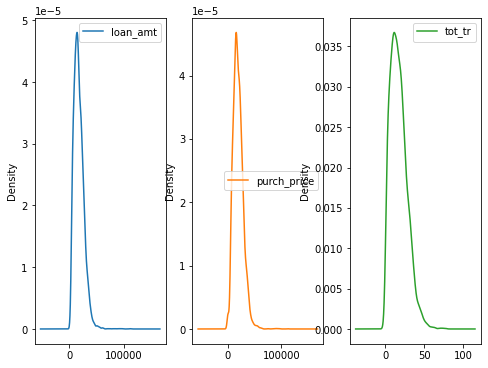

In [73]:
accept[['loan_amt','purch_price','tot_tr']].plot(kind='kde',figsize=(8,6),subplots=True,layout=(1,3),sharex=False)

- 定义MC（mdcouple），衡量偏度的指标

$$
\text{MC} = \underset{x_i\le Q_2\le x_j}{\text{median}}\; h(x_i,xj)
$$

- 其中，$Q_2$为数据的中位数

$$
h(x_i,x_j)=\frac{(x_j-Q_2)-(Q_2-x_i)}{x_j-x_i}
$$

$$
\begin{cases}
    \text{MC}>0,分布右偏\\
    \text{MC}<0,分布左偏\\
    \text{MC}=0,分布对称\\
\end{cases}
$$

- 正常数据区间
$$
\begin{cases}
    [Q_1-1.5e^{-4\mathbf{MC}}\mathbf{IQR},Q_3+1.5e^{3\mathbf{MC}}\mathbf{IQR}],\mathbf{MC}>0\\
    [Q_1-1.5e^{-3\mathbf{MC}}\mathbf{IQR},Q_3+1.5e^{4\mathbf{MC}}\mathbf{IQR}],\mathbf{MC}<0
\end{cases}
$$

- 利用statsmodels计算MC

```python
from statsmodels.stats.stattools import medcouple
```

In [82]:
mc = accept[['loan_amt','purch_price','tot_tr']].apply(medcouple, axis=0).astype(float) #对于每一列计算MC
mc

loan_amt       0.156675
purch_price    0.109720
tot_tr         0.096774
dtype: float64

In [79]:
# 计算左界系数和右界系数
left_adj = np.where(mc>0, np.exp(-4*mc), np.exp(-3*mc))
right_adj = np.where(mc>0, np.exp(3*mc), np.exp(4*mc))
left_adj
right_adj

array([0.53435266, 0.64475811, 0.67902538])

array([1.60003328, 1.38980026, 1.33685866])

In [80]:
df = accept[['loan_amt','purch_price','tot_tr']]
rev4 = df[((df < (Q1 - 1.5 * left_adj*IQR)) | (df > (Q3 + 1.5 * right_adj*IQR))).any(axis=1)]
rev4

,loan_amt,purch_price,tot_tr
15,28700.00,63700.00,11.0
66,20212.00,0.00,5.0
101,21345.00,0.00,31.0
312,21000.00,0.00,14.0
315,60980.00,59635.00,10.0
...,...,...,...
5628,26367.28,1.00,13.0
5680,59975.00,60970.00,13.0
5686,56330.07,57157.66,38.0
5707,23351.00,0.00,33.0


# 数据集成

## 数据的横向合并

- 把多个`DataFrame`按照行衔接起来

In [36]:
h1Df = pd.DataFrame({'语文':[93,80,85,76,60],'数学':[87,99,95,85,70],'英语':[80,85,97,65,88]},index=['韩梅','李雷','李华','王铭','赵毅'])
h2Df = pd.DataFrame({'篮球':[93,80,85,76],'舞蹈':[87,99,95,85]},index=['李华','王铭','赵毅','刘强'])

In [37]:
h1Df
h2Df

,语文,数学,英语
韩梅,93,87,80
李雷,80,99,85
李华,85,95,97
王铭,76,85,65
赵毅,60,70,88


,篮球,舞蹈
李华,93,87
王铭,80,99
赵毅,85,95
刘强,76,85


```python
DataFrame.merge(right, how='inner', left_index=False, right_index=False)
```
- `right`：要被连接的`DataFrame`，即右`DataFrame`
- `how`：如何连接两个`DataFrame`
    + `inner`：连接左右两个`DataFrame`的`index`中共同出现的行
    + `outer`：连接左右两个`DataFrame`的所有`index`
    + `left`：用左`DataFrame`的`index`连接
    + `right`：用右`DataFrame`的`index`连接
- `left_index`：是否用左`DataFrame`的`index`作为连接的条件，默认为`False`
- `right_index`：是否用右`DataFrame`的`index`作为连接的条件，默认为`False`
- 返回的值是连接后的`DataFrame`

<center><img src="./img/explore/pandasMergeInner.svg" width=80%></center>

In [33]:
h1Df.merge(h2Df,how='inner',left_index=True,right_index=True)

,语文,数学,英语,篮球,舞蹈
李华,85,95,97,93,87
王铭,76,85,65,80,99
赵毅,60,70,88,85,95


<center><img src="./img/explore/pandasMergeLeft.svg" width=80%></center>

In [34]:
h1Df.merge(h2Df,how='left',left_index=True,right_index=True)

,语文,数学,英语,篮球,舞蹈
韩梅,93,87,80,NaN,NaN
李雷,80,99,85,NaN,NaN
李华,85,95,97,93.0,87.0
王铭,76,85,65,80.0,99.0
赵毅,60,70,88,85.0,95.0


<center><img src="./img/explore/pandasMergeRight.svg" width=80%></center>

In [35]:
h1Df.merge(h2Df,how='right',left_index=True,right_index=True)

,语文,数学,英语,篮球,舞蹈
李华,85.0,95.0,97.0,93,87
王铭,76.0,85.0,65.0,80,99
赵毅,60.0,70.0,88.0,85,95
刘强,NaN,NaN,NaN,76,85


<center><img src="./img/explore/pandasMergeOuter.svg" width=80%></center>

In [36]:
h1Df.merge(h2Df,how='outer',left_index=True,right_index=True)

,语文,数学,英语,篮球,舞蹈
刘强,NaN,NaN,NaN,76.0,85.0
李华,85.0,95.0,97.0,93.0,87.0
李雷,80.0,99.0,85.0,NaN,NaN
王铭,76.0,85.0,65.0,80.0,99.0
赵毅,60.0,70.0,88.0,85.0,95.0
韩梅,93.0,87.0,80.0,NaN,NaN


## 数据的纵向合并

- 把多个具有相同列名的`DataFrame`按列衔接起来

```python
pd.concat(objs, axis=0, join='outer',ignore_index=False)
```
- `objs`：需要纵向连接的所有`DataFrame`构成的**列表**
- `join`：连接方式，可选值'inner'或者'outer'
- 返回纵向连接后的`DataFrame`

In [15]:
pd.concat([h1Df,h2Df],ignore_index=True)

,语文,数学,英语,篮球,舞蹈
0,93.0,87.0,80.0,NaN,NaN
1,80.0,99.0,85.0,NaN,NaN
2,85.0,95.0,97.0,NaN,NaN
3,76.0,85.0,65.0,NaN,NaN
4,60.0,70.0,88.0,NaN,NaN
5,NaN,NaN,NaN,93.0,87.0
6,NaN,NaN,NaN,80.0,99.0
7,NaN,NaN,NaN,85.0,95.0
8,NaN,NaN,NaN,76.0,85.0


# 数据变换

## 通过函数或映射

- 通过函数将原始数据的属性值映射为一系列新值

- 简单函数变化，例如通过$\log_x$可以降低不同属性之间数据的波动

```python
import math
```

In [42]:
# math.log(5400)
# math.log(10)

- 通过`pandas`的`map()`函数映射

```python
Series.map(arg, na_action=None)
```
- 可以对`Pandas`的`Series`或者`Dataframe`的某一列的所有元素进行映射
- `arg`：映射的函数或者字典
- `na_action`：取值为`None`或者`ignore`。如果为`ignore`，则不对序列（`Series`）中的缺失值进行映射

In [69]:
s = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
s
# s.map('这是一个{}'.format)
# s.map('这是一个{}'.format,na_action='ignore')
s.map({'cat': 'kitten', 'dog': 'puppy'})

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

## 标准化

- 规范化（normalization）
    + 利用频率、均值、方差、范围等调整不同属性之间波动差异的过程
    + $\hat{x}=\frac{x-\bar{x}}{s_x}$，其中$\bar{x}$和$s_x$分别是均值和标准差，将原始数据**标准化**（standardization）为均值为$0$，标准差为$1$的数据

In [45]:
# accDf = pd.read_csv('./data/pandas/accepts.csv', header=0)
# def standardize(x):
#     return (x-accDf['purch_price'].mean())/accDf['purch_price'].std()

# newPurch = accDf['purch_price'].apply(standardize)

## 离散化（discretization）

- 将连续属性变成分类属性
    + 分类算法经常使用离散变量

- 将连续或者分类属性变成二元属性 
    + 关联分析经常使用非对称的二元属性

### 分类属性二元化

- 假设有$m$个分类值，对应$[0, m-1]$中的整数

- 将分类属性二元化，就是将每个分类对应的整数用**二进制**表示

- 总共需要$n=\lceil\log_2^m\rceil$个二进制数表示所有的分类值

- 假设一个具有五个值的分类属性：`[awful, poor, OK, good, great]`，对应的整数值分别是`0, 1, 2, 3, 4`

分类值|整数值|$x_1$|$x_2$|$x_3$
---|---|---|---|---
awful|0|0|0|0
poor|1|0|0|1
OK|2|0|1|0
good|3|0|1|1
great|4|1|0|0

- 为每一个分类值引入一个二元属性，形成非对称的二元属性

分类值|整数值|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$
---|---|---|---|---|---|---
awful|0|1|0|0|0|0
poor|1|0|1|0|0|0
OK|2|0|0|1|0|0|0
good|3|0|0|0|1|0
great|4|0|0|0|0|1

### 连续属性离散化

- 确定分成多少个区间

- 确定分割点（split point）的位置

#### 等宽（equal width）方法

- 将属性的值域划分成相同宽度的区间

- ```python
pandas.cut(x, bins, right=True, labels=None, retbins=False)
```
    + `x`：需要被离散化的**一维**数组数据
    + `bins`：等分的区间数量，`int`类型
    + `right`：区间是否包含右边界，默认包含。例如，$[1, 2, 3, 4]$划分成$(1, 2], (2, 3], (3, 4]$
    + `labels`：给每个区间添加自定义标签
    + `retbins`：返回划分的区间

In [46]:
# import numpy as np
# import pandas as pd
# d1 = 0.2*np.random.randn(100)+5
# d1y = np.random.random(100)
# d2 = 0.2*np.random.randn(50)+8
# d3 = 0.2*np.random.randn(50)+10
# d23 = np.hstack((d2,d3))
# d23y = np.random.random(100)
# d4 = 0.2*np.random.randn(100)+15
# d4y= np.random.random(100)
# d0=0
# d5=20
# d0z = np.array([d0, np.random.random(1), 0]).reshape(1,3)
# d1z = np.array([d1,d1y, np.ones(100)]).transpose()
# d2z = np.array([d23,d23y, np.ones(100)*2]).transpose()
# d4z = np.array([d4,d4y,np.ones(100)*3]).transpose()
# d5z = np.array([d5, np.random.random(1), 4]).reshape(1,3)
# d5z.shape
# d = np.vstack((d0z,d1z,d2z,d4z,d5z))
# pd.DataFrame(d).to_csv('./data/pandas/descritization.csv', index=False, header=['x', 'y', 'class'])

In [47]:
# %matplotlib inline
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# d = pd.read_csv('./data/pandas/descritization.csv', header=0)
# print(d.head())
# plt.figure(figsize=(12,6))
# plt.scatter(d.iloc[:,0], d.iloc[:, 1], c=np.hstack((4, np.zeros(100), np.ones(100)*20, np.ones(100)*40, 60)))
# plt.plot(np.ones(100)*5, np.random.random(100), c='red')
# plt.plot(np.ones(100)*10, np.random.random(100), c='red')
# plt.plot(np.ones(100)*15, np.random.random(100), c='red')
# plt.savefig('./img/pandas/descritization.svg')
# equalW = pd.cut(d.iloc[:,0], 4, retbins=True)
# print(equalW)
# equalW[0].value_counts()

<center><img src="./img/pandas/descritization.svg" width=100%></center>

#### 等频率（equal frequency）方法

- 将相同数量的对象放进每个区间

- ```python
pandas.qcut(x, q, labels=None, retbins=False)
```
    + 基于分位数的离散化函数
    + `q`：分位数的数量

In [48]:
# equalF = pd.qcut(d.iloc[:,0], 4, retbins=True)
# print(equalF[0].value_counts())
# gbins = equalF[1]
# plt.figure(figsize=(12,6))
# plt.scatter(d.iloc[:,0], d.iloc[:, 1], c=np.hstack((4, np.zeros(100), np.ones(100)*20, np.ones(100)*40, 60)))
# plt.plot(np.ones(100)*gbins[1], np.random.random(100), 'm--')
# plt.plot(np.ones(100)*gbins[2], np.random.random(100), 'm--')
# plt.plot(np.ones(100)*gbins[3], np.random.random(100), 'm--')
# # plt.plot(np.ones(100)*5, np.random.random(100), c='red')
# # plt.plot(np.ones(100)*10, np.random.random(100), c='red')
# # plt.plot(np.ones(100)*15, np.random.random(100), c='red')
# plt.savefig('./img/pandas/descritizationEqual.svg')

```python
equalF = pd.qcut(d.iloc[:,0], 4, retbins=True)
```

<center><img src="./img/pandas/descritizationEqual.svg" width=100%></center>

# 数据规约

## 聚集（aggregation）

- 将两个或多个对象合并成单个对象

- 减少数据对象的数量

- 改变数据的分辨率
    + 城市聚集成地区、省份、国家
    + 日数据聚集成周数据、月数据、年数据

- 聚集可以平滑数据

### 分组运算

- 聚集本质上是对数据的分组运算

- 分组运算机制：拆分－应用－合并（split-apply-combine）

<center><img src="./img/pandas/groupby.png" width=60%></center>

### `groupby`函数

- ```python
DataFrame.groupby(by=None, axis=0, sort=True)
```
    + `by`：分组的依据
        * `label`或者`list of labels`：列的名称
        * `dict`：字典的值是分组的依据
    + `sort`：排序分组的键，令`sort=False`可以提高分组的效率

In [70]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'], 'key2' : ['one', 'two', 'one', 'two', 'one'], 'data1' : np.random.randn(5), 'data2' : np.random.randn(5)})
df
gp = df.groupby(by='key2')
gp

,key1,key2,data1,data2
0,a,one,1.644327,0.856074
1,a,two,0.372429,-0.427077
2,b,one,0.762597,-0.988409
3,b,two,0.153580,0.049430
4,a,one,-1.423149,-1.052199


In [71]:
grouped = df.groupby(['key1', 'key2'])
grouped

- 对`groupby`对象进行迭代
    + 分组标志为迭代对象的标签
    + 组形成数据块

In [73]:
# for each in grouped:
#     print(each)
for (label1, label2), group in grouped:
    print(label1, label2)
    print(group)

a one
  key1 key2     data1     data2
0    a  one  1.644327  0.856074
4    a  one -1.423149 -1.052199
a two
  key1 key2     data1     data2
1    a  two  0.372429 -0.427077
b one
  key1 key2     data1     data2
2    b  one  0.762597 -0.988409
b two
  key1 key2    data1    data2
3    b  two  0.15358  0.04943


- 利用字典进行分组
    + 按列分组，`axis=1`

In [108]:
people = pd.DataFrame(np.random.randn(5, 5), columns=['a', 'b', 'c', 'd', 'e'],  index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people
mapping = {'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f' : 'orange'}
people.groupby(mapping, axis=1).count()

,a,b,c,d,e
Joe,0.579968,0.080609,1.713611,0.745434,0.031481
Steve,0.703997,0.566236,0.593159,0.169146,-1.577003
Wes,-0.282523,-0.517844,1.158383,1.201100,-0.456551
Jim,-1.377054,0.727628,1.200159,0.851049,-0.740768
Travis,-1.210369,-0.397417,0.901824,-1.308957,-1.459697


,blue,red
Joe,2,3
Steve,2,3
Wes,2,3
Jim,2,3
Travis,2,3


- 对分组对象应用`size()`函数，返回各个分组的大小

In [50]:
# grouped.mean()

## 聚合计算

- 对分组的数据进行计算

函数|说明
---|---
`count()`|分组中非`NaN`的数量
`sum()`|非`NaN`的和
`mean()`|非`NaN`的均值 
`median()`|非`NaN`的中位数
`std()`, `var()`|非`NaN`的标准差和方差
`min()`, `max()`|非`NaN`的最小值和最大值
`prod()`|非`NaN`的积
`first()`, `last()`|第一个或最后一个非`NaN`的值


### 聚合函数`agg`或`aggregate`

- ```python
DataFrame.agg(func, axis=0)
```
    + `func`：
        * 函数或函数名称
        * 函数列表或函数名称列表，计算结果会有相应的函数名称标明
        * 字典，格式为`label: 函数，函数名称，或它们的列表`，可以为不同的列应用不同的函数

In [75]:
# df.groupby('key1').agg(['mean','std'])
df.groupby(['key1']).agg({'data1': ['mean'], 'data2': ['std']})

,data1,data2
,mean,std
key1,,
a,0.197869,0.972861
b,0.458089,0.733863


- 可以给`agg`传入自定义函数

In [119]:
def maxMinRatio(arr):
    return arr.max()/arr.min()
df.groupby('key1').agg(['mean', maxMinRatio])

data1                 data2            
          mean maxMinRatio      mean maxMinRatio
key1                                            
a     1.088756    4.402310 -0.409956    0.334861
b    -0.108346    0.807305  0.789026    5.073579

### `apply`函数

- ```python
DataFrame.apply(func, axis=0)
```
    + `fun`：对每行或列应用的函数

In [76]:
applyDf = pd.DataFrame([[4, 9],] * 3, columns=['A', 'B'])
applyDf
applyDf.apply('max', axis=1) 

,A,B
0,4,9
1,4,9
2,4,9


0    9
1    9
2    9
dtype: int64